# Regression - Linear Regression

11 Dec 2019

Model 1 - mse 5.03 - First Model

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df['Sex'] = df['Sex'].replace(('I','M','F'),(0,1,2))

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Preprocessing

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X, y

(      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
 0       1   0.455     0.365   0.095        0.5140          0.2245   
 1       1   0.350     0.265   0.090        0.2255          0.0995   
 2       2   0.530     0.420   0.135        0.6770          0.2565   
 3       1   0.440     0.365   0.125        0.5160          0.2155   
 4       0   0.330     0.255   0.080        0.2050          0.0895   
 ...   ...     ...       ...     ...           ...             ...   
 4172    2   0.565     0.450   0.165        0.8870          0.3700   
 4173    1   0.590     0.440   0.135        0.9660          0.4390   
 4174    1   0.600     0.475   0.205        1.1760          0.5255   
 4175    2   0.625     0.485   0.150        1.0945          0.5310   
 4176    1   0.710     0.555   0.195        1.9485          0.9455   
 
       Viscera weight  Shell weight  
 0             0.1010        0.1500  
 1             0.0485        0.0700  
 2             0.1415        0.2100  
 3    

In [20]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
X_te.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
668,1,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1580,0,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
3784,1,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
463,0,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
2615,1,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [21]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((3341, 8), (836, 8), (3341,), (836,))

### Visualization

In [10]:
import seaborn as sns

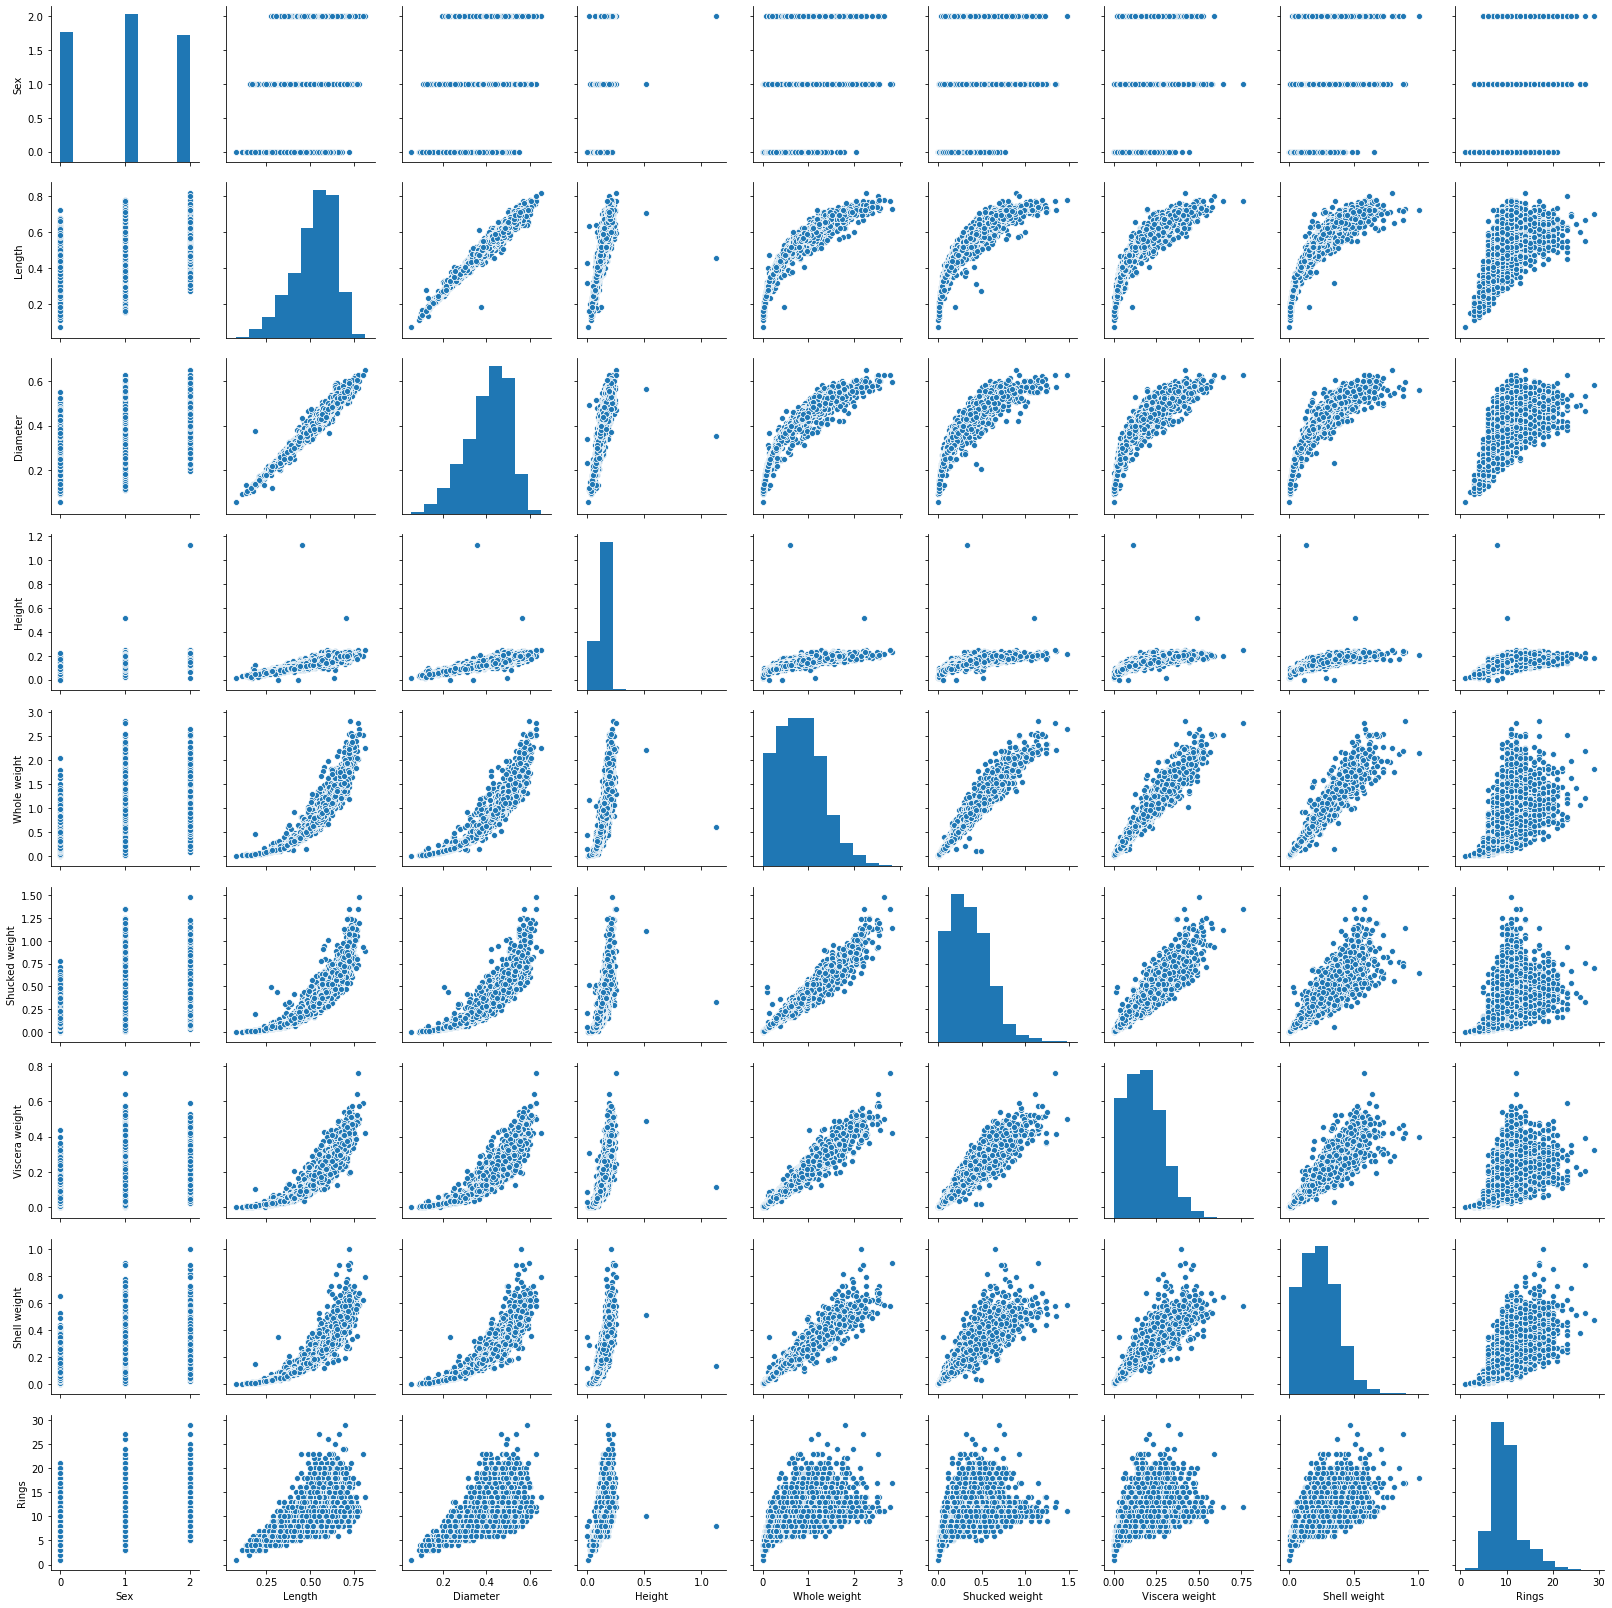

In [11]:
sns.pairplot(df)

## Model 1 Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linreg = LinearRegression()
linreg.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred = linreg.predict(X_te)

## Evaluate

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
mean_squared_error(y_te, y_pred)

5.036852349442371

In [27]:
r2_score(y_te, y_pred)

0.5362147277241376